In [6]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [309]:
# Загрузим случайные 10 тыс. строк, т.к. все умирает на большом сете
df = pd.read_csv('train.csv').sample(frac=1).sample(n=10000)
print(df.shape)

(10000, 11)


In [310]:
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
130010  id2196935          2  2016-01-29 19:20:13  2016-01-29 19:22:43   
650595  id1633714          1  2016-02-26 23:38:14  2016-02-27 00:19:22   
409161  id2994692          2  2016-04-21 06:27:29  2016-04-21 06:35:38   
71726   id1530713          2  2016-01-26 09:14:27  2016-01-26 09:30:12   
200431  id1260373          1  2016-06-06 08:07:48  2016-06-06 08:37:47   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
130010                1        -73.973991        40.791836         -73.977707   
650595                1        -74.001472        40.730942         -73.916473   
409161                1        -74.008514        40.714409         -74.001534   
71726                 3        -73.991798        40.745880         -73.986572   
200431                1        -73.956139        40.784630         -74.011208   

        dropoff_latitude store_and_fwd_flag  trip_duration  
130010         40.789284                  N            150  
650595         40.773018                  N           2468  
409161         40.741116                  N            489  
71726          40.753510                  N            945  
200431         40.702026                  N           1799

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 130010 to 366817
Data columns (total 11 columns):
id                    10000 non-null object
vendor_id             10000 non-null int64
pickup_datetime       10000 non-null object
dropoff_datetime      10000 non-null object
passenger_count       10000 non-null int64
pickup_longitude      10000 non-null float64
pickup_latitude       10000 non-null float64
dropoff_longitude     10000 non-null float64
dropoff_latitude      10000 non-null float64
store_and_fwd_flag    10000 non-null object
trip_duration         10000 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 937.5+ KB


In [312]:
df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  10000.000000     10000.000000      10000.000000     10000.000000   
mean       1.539600         1.682400        -73.973295        40.751086   
std        0.498454         1.328724          0.038749         0.028056   
min        1.000000         0.000000        -74.177650        40.609295   
25%        1.000000         1.000000        -73.991951        40.737648   
50%        2.000000         1.000000        -73.981743        40.753611   
75%        2.000000         2.000000        -73.967163        40.768334   
max        2.000000         6.000000        -73.427681        40.895775   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       10000.000000      10000.000000   10000.000000  
mean          -73.974012         40.751802    1016.020600  
std             0.064551          0.033058    3924.167928  
min           -79.338699         40.576267       4.000000  
25%           -73.991470         40.735750     396.000000  
50%           -73.979889         40.753971     669.000000  
75%           -73.963377         40.769422    1078.000000  
max           -73.427689         41.427902   86377.000000

C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



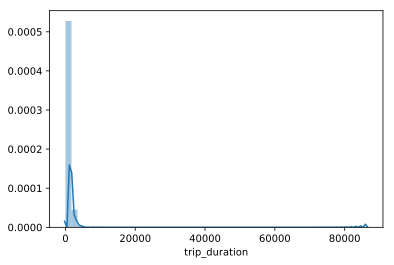

In [313]:

#%config InlineBackend.figure_format = 'svg' 
sns.distplot(df.trip_duration);

In [314]:
df["trip_duration"].value_counts().head()

434    21
474    19
333    18
658    17
608    17
Name: trip_duration, dtype: int64

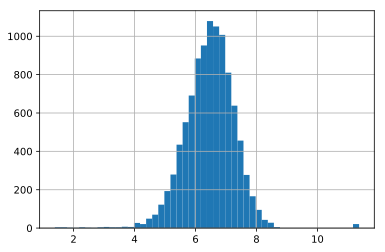

In [315]:
# В логирифмах более нормально
ax = np.log(df.trip_duration).hist(bins = 50)

C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



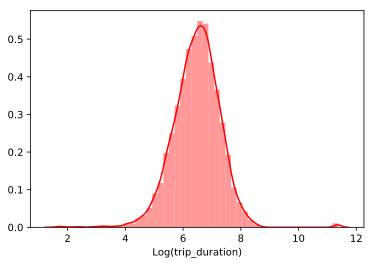

In [316]:
sns.distplot(np.log(df['trip_duration'].values+1), axlabel = 'Log(trip_duration)', label = 'log(trip_duration)', bins = 50, color="r")

2) Посмотрим как  поездки распредлены географически

In [317]:
longitude = list(df.pickup_longitude) + list(df.dropoff_longitude)
latitude = list(df.pickup_latitude) + list(df.dropoff_latitude)
plt.figure(figsize = (10,10))
plt.plot(longitude,latitude,'.', alpha = 0.4, markersize = 0.05)
plt.show()

In [318]:
x_bound = [-74.05, -73.90]
y_bound = [40.65, 40.88]
df = df[(df.pickup_longitude> x_bound[0]) & (df.pickup_longitude < x_bound[1])]
df = df[(df.dropoff_longitude> x_bound[0]) & (df.dropoff_longitude < x_bound[1])]
df = df[(df.pickup_latitude> y_bound[0]) & (df.pickup_latitude < y_bound[1])]
df = df[(df.dropoff_latitude> y_bound[0]) & (df.dropoff_latitude < y_bound[1])]

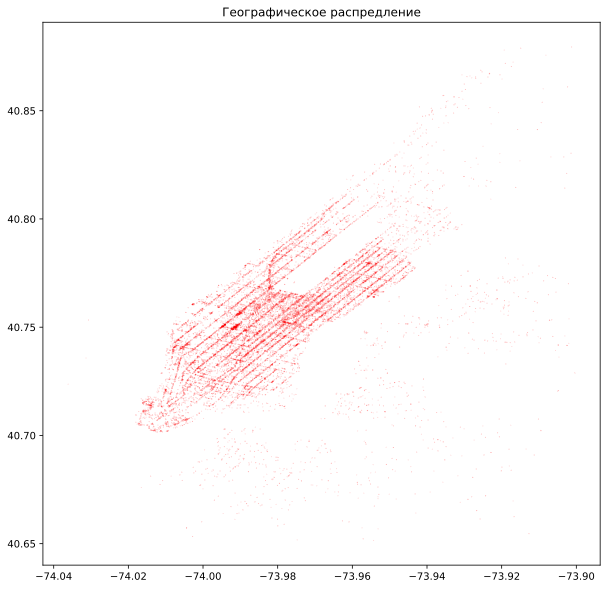

In [319]:
# В приципе, похоже, на Манхеттен.Даже центральный парк виден
longitude = list(df.pickup_longitude) + list(df.dropoff_longitude)
latitude = list(df.pickup_latitude) + list(df.dropoff_latitude)
plt.figure(figsize = (10,10))
plt.title('Географическое распредление')
plt.plot(longitude,latitude,'.', markeredgecolor='red',alpha = 1, markersize = 0.1)
plt.show()

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9125 entries, 130010 to 366817
Data columns (total 11 columns):
id                    9125 non-null object
vendor_id             9125 non-null int64
pickup_datetime       9125 non-null object
dropoff_datetime      9125 non-null object
passenger_count       9125 non-null int64
pickup_longitude      9125 non-null float64
pickup_latitude       9125 non-null float64
dropoff_longitude     9125 non-null float64
dropoff_latitude      9125 non-null float64
store_and_fwd_flag    9125 non-null object
trip_duration         9125 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 855.5+ KB


3) Посмотрим, какое число пассажиров преобладает в поездках.

In [321]:
t_df = df.groupby('passenger_count')[['id']].count()/len(df.passenger_count)

In [322]:
t_df.sort_values('id', ascending=False).style.bar()

In [323]:
sum_df = df.groupby('vendor_id')[['trip_duration']].sum()

In [324]:
sum_df['avg']=sum_df['trip_duration'].mean()

In [325]:
sum_df 

trip_duration        avg
vendor_id                          
1                3078620  4131337.0
2                5184054  4131337.0

In [326]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [327]:
trace0 = go.Bar(
    x=sum_df.index,
    y=sum_df.trip_duration,
    name='Средний километраж вендора',
    orientation = 'v'
)
#"""
trace1 = go.Bar(
    x=sum_df.index,
    y=sum_df.avg,
    name='Средний километраж',
    orientation = 'v'
)
#"""
data = [trace0,trace1]
layout = {'title': 'Перевозки вендерами'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [329]:
#Переведем даты поездок в дн недели
from datetime import datetime
import calendar

In [331]:
df['day_of_week'] = df['pickup_datetime'].apply(lambda x: calendar.day_name[datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday()])


In [333]:
data = []

for genre in df.day_of_week.unique():
    data.append(
        go.Box(y=df[df.day_of_week==genre].trip_duration, 
               name=genre)
    )
iplot(data, show_link = False)

In [339]:
#Видим много выбросов снова, давайте обрежем на глаз
df = df[(df.trip_duration<3000.00)]

In [340]:
data = []

for genre in df.day_of_week.unique():
    data.append(
        go.Box(y=df[df.day_of_week==genre].trip_duration, 
               name=genre)
    )
iplot(data, show_link = False)